<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Regression Example 

#### Example of using TMVA for regression problems

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.09/03


### Enable JS visualization
To use new interactive features in notebook we have to enable a module called JsMVA. This can be done by using ipython magic: %jsmva.

In [2]:
from IPython.core.extensions import ExtensionManager
ExtensionManager(get_ipython()).load_extension("JsMVA.JsMVAMagic")

In [3]:
%jsmva on

## Input File


In [4]:
inputFile = ROOT.TFile.Open("inputdata_regression.root")
outputFile = ROOT.TFile.Open("TMVAOutputRegression.root", "RECREATE")
inputFile.ls()

TFile** inputdata_regression.root
TFile* inputdata_regression.root
KEY: TTree TreeS;1 TreeS
KEY: TTree TreeB;1 TreeB
KEY: TTree Sig;1 TreeS
KEY: TTree Bkg;1 TreeB


In [5]:
inputFile.Sig.Print()

******************************************************************************
*Tree :Sig : TreeS *
*Entries : 6000 : Total = 98509 bytes File Size = 89799 *
* : : Tree compression factor = 1.08 *
******************************************************************************
*Br 0 :var1 : var1/F *
*Entries : 6000 : Total Size= 24542 bytes File Size = 22365 *
*Baskets : 1 : Basket Size= 32000 bytes Compression= 1.08 *
*............................................................................*
*Br 1 :var2 : var2/F *
*Entries : 6000 : Total Size= 24542 bytes File Size = 22361 *


## Declare TMVA Factory


Arguments of constructor:
The options string can contain the following options:
<table>
<tr><th>Keyword</th><th>Can be used as positional argument</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
 <td>JobName</td>
 <td>yes, 1.</td>
 <td>not optional</td>
 <td>-</td>
 <td>Name of job</td>
</tr>
<tr>
 <td>TargetFile</td>
 <td>yes, 2.</td>
 <td>if not passed histograms won't be saved</td>
 <td>-</td>
 <td>File to write control and performance histograms histograms </td>
</tr>
<tr>
 <td>V</td>
 <td>no</td>
 <td>False</td>
 <td>-</td>
 <td>Verbose flag</td>
</tr>
<tr>
 <td>Color</td>
  <td>no</td>

 <td>True</td>
 <td>-</td>
 <td>Flag for colored output</td>
</tr>
<tr>
 <td>Transformations</td>
  <td>no</td>

 <td>""</td>
 <td>-</td>
 <td>List of transformations to test. For example with "I;D;P;U;G" string identity, decorrelation, PCA, uniform and Gaussian transformations will be applied</td>
</tr>
<tr>
 <td>Silent</td>
  <td>no</td>

 <td>False</td>

 <td>-</td>
 <td>Batch mode: boolean silent flag inhibiting
any output from TMVA after
the creation of the factory class object</td>
</tr>
<tr>
 <td>DrawProgressBar</td>
  <td>no</td>

 <td>True</td>
 <td>-</td>
 <td>Draw progress bar to display training,
testing and evaluation schedule (default:
True)</td>
</tr>
<tr>
 <td>AnalysisType</td>
  <td>no</td>

 <td>Auto</td>
 <td>Classification,
Regression,
Multiclass, Auto</td>
 <td>Set the analysis type</td>
</tr>
</table>

In [6]:
TMVA.Tools.Instance();

factory = TMVA.Factory("TMVARegression", TargetFile=outputFile,
                       V=False, Color=True, DrawProgressBar=True, Transformations=["I", "D", "P", "G", "D"],
                       AnalysisType="Regression")


## Declare DataLoader

First we need to declare a DataLoader and add the variables (passing the variable names used in the test and train trees in input dataset). To add variable names to DataLoader we use the AddVariable function. Arguments of this function:

1. String containing the variable name. Using ":=" we can add definition too.

2. String (label to variable, if not present the variable name will be used) or character (defining the type of data points)

3. If we have label for variable, the data point type still can be passed as third argument 

Example: 

loader.AddVariable( "myvar1 := var1+var2", 'F' )

In this case we add all 256 variables with a loop

In [7]:
loader = TMVA.DataLoader("dataset");

## Add the feature variables, names reference branches in inputFile ttree
loader.AddVariable("var1");
loader.AddVariable("var2");
loader.AddVariable("var3");
loader.AddVariable("var4");
loader.AddVariable("var5 := var1-var3");  # create new features
loader.AddVariable("var6 := var1+var2");



In [8]:
loader.AddTarget("target := var2+var3")

## Setup Dataset(s)

To pass the signal and background trees to DataLoader we use the AddSignalTree and AddBackgroundTree functions, and we set up the corresponding DataLoader variable's too. Arguments of functions:

With using DataLoader.PrepareTrainingAndTestTree function we apply cuts on input events. In C++ this function also needs to add the options as a string (as we seen in Factory constructor) which with JsMVA can be passed (same as Factory constructor case) as keyword arguments.

Arguments of PrepareTrainingAndTestTree:
<table>

<tr>
    <th>Keyword</th>
    <th>Can be used as positional argument</th>
    <th>Default</th>
    <th>Predefined values</th>
    <th>Description</th>
</tr>

<tr>
    <td>SigCut</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td>TCut object for signal cut</td>
</tr>
<tr>
    <td>Bkg</td>
    <td>yes, 2.</td>
    <td>-</td>
    <td>-</td>
    <td>TCut object for background cut</td>
</tr>

<tr>
    <td>SplitMode</td>
    <td>no</td>
    <td>Random</td>
    <td>Random,
Alternate,
Block</td>
    <td>Method of picking training and testing
events</td>
</tr>
<tr>
    <td>MixMode</td>
    <td>no</td>
    <td>SameAsSplitMode</td>
    <td>SameAsSplitMode,
Random,
Alternate,
Block</td>
    <td>Method of mixing events of differnt
classes into one dataset</td>
</tr>
<tr>
    <td>SplitSeed</td>
    <td>no</td>
    <td>100</td>
    <td>-</td>
    <td>Seed for random event shuffling</td>
</tr>
<tr>
    <td>NormMode</td>
    <td>no</td>
    <td>EqualNumEvents</td>
    <td>None, NumEvents,
EqualNumEvents</td>
    <td>Overall renormalisation of event-by-event
weights used in the training (NumEvents:
average weight of 1 per
event, independently for signal and
background; EqualNumEvents: average
weight of 1 per event for signal,
and sum of weights for background
equal to sum of weights for signal)</td>
</tr>

<tr>
    <td>nTrain_Signal</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of training events of class Signal</td>
</tr>

<tr>
    <td>nTest_Signal</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of test events of class Signal</td>
</tr>

<tr>
    <td>nTrain_Background</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of training events of class
Background</td>
</tr>

<tr>
    <td>nTest_Background </td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of test events of class Background</td>
</tr>
<tr>
    <td>V</td>
    <td>no</td>
    <td>False</td>
    <td>-</td>
    <td>Verbosity</td>
</tr>
<tr>
    <td>VerboseLevel</td>
    <td>no</td>
    <td>Info</td>
    <td>Debug, Verbose,
Info</td>
    <td>Verbosity level</td>
</tr>

</table>

In [9]:
mycuts = ROOT.TCut()
mycutb = ROOT.TCut()


loader.AddRegressionTree    (inputFile.Sig,     1.0)   

 
loader.PrepareTrainingAndTestTree(mycuts, nTrain_Regression=100, SplitMode="Random", NormMode="NumEvents", V=False)

# Booking Methods

Book the method for regression. Here we choose the Boosted Decision Tree model. You have to use gradient boosted trees for regression, hence the BDTG and BoostType=Grad.

Define the hyperparameters: ntrees, boosttype, shrinkage, and the depth. Also define the loss function you want to use: 'AbsoluteDeviation', 'Huber', or 'LeastSquares'. nCuts determines how finely to look at each feature. Larger values take more time, but you may get more accurate results.

In [10]:
option = "!H:!V:NTrees=64::BoostType=Grad:Shrinkage=0.3:nCuts=20:MaxDepth=4:"
option += "RegressionLossFunctionBDTG=LeastSquares"
factory.BookMethod( loader, TMVA.Types.kBDT,"BDTG", option)


<ROOT.TMVA::MethodBDT object ("BDTG") at 0x58f9980>

## Train Methods


In [11]:
factory.TrainAllMethods();

Regression Loss Function: LeastSquares
Training 64 Decision Trees ... patience please
Elapsed time for training with 100 events: 0.0375 sec
Dataset[dataset] : Create results for training
Dataset[dataset] : Evaluation of BDTG on training sample
Dataset[dataset] : Elapsed time for evaluation of 100 events: 0.00135 sec
Create variable histograms
Create regression target histograms
Create regression average deviation
Results created
Creating xml weight file: dataset/weights/TMVARegression_BDTG.weights.xml


## Test and Evaluate Methods

To test test the methods and evaluate the performance we need to run Factory.TestAllMethods and Factory.EvaluateAllMethods functions.

In [12]:
factory.TestAllMethods();
factory.EvaluateAllMethods();    

## Gather and Plot the Results


Let's plot the residuals for the BDTG predictions. First, close the output file so that it saves to disk and we can open it without issue. Then get the results on the test set. Finally, plot the residuals.

In [13]:
outputFile.Close()
resultsFile= ROOT.TFile("TMVAOutputRegression.root")
resultsFile.ls()

TFile** TMVAOutputRegression.root
TFile* TMVAOutputRegression.root
KEY: TDirectoryFile dataset;1 Base directory for dataset dataset


In [14]:
resultsTree= resultsFile.Get("dataset/TestTree")
#resultsTree.Print()


FCN=433.456 FROM MIGRAD STATUS=CONVERGED 70 CALLS 71 TOTAL
EDM=5.54149e-07 STRATEGY= 1 ERROR MATRIX ACCURATE
EXT PARAMETER STEP FIRST
NO. NAME VALUE ERROR SIZE DERIVATIVE
1 Par_0 2.94623e+02 5.80549e+00 4.06441e-02 -6.41209e-05
2 Par_1 8.49870e-03 3.10135e-03 3.15731e-05 2.27977e-01
3 Par_2 2.28878e-01 3.27488e-03 2.89200e-05 1.18815e-01


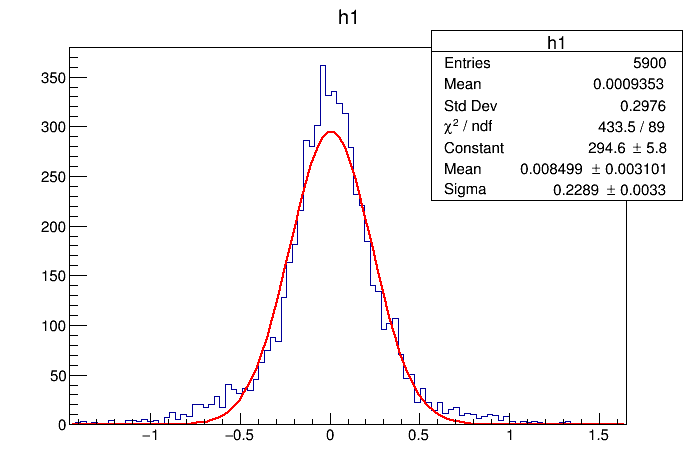

In [15]:
h1 = ROOT.TH1D("h1","h1",100,1,0)
resultsTree.Draw("BDTG-target >> h1")
h1.Fit("gaus")
ROOT.gStyle.SetOptFit(111)
ROOT.gPad.Draw()